# **Algoritmos: Coloreado de Grafos**

### **Marcos Damián Pool Canul** & **OScar Manuel Ruiz Reyes**

In [90]:
from tabulate import tabulate
import networkx as nx
import matplotlib.pyplot as plt
import random

## **Algoritmo de Coloración de Welsh y Powell**

In [91]:
def welsh_powell(G):
    sorted_vertices = sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=True)
    colors = {}
    current_color = 0

    for vertex in sorted_vertices:
        if vertex not in colors:
            colors[vertex] = current_color
            for neighbor in G.neighbors(vertex):
                if neighbor not in colors and all(colors.get(adjacent) != current_color for adjacent in G.neighbors(neighbor)):
                    colors[neighbor] = current_color
            current_color += 1

    return colors

In [92]:
def crear_grafo(num_vertices):
    """ Create a connected graph with a given number of vertices. """
    G = nx.Graph()
    G.add_nodes_from(range(num_vertices))

    # Ensure the graph is connected
    for i in range(1, num_vertices):
        G.add_edge(i, i - 1)

    # Add some additional edges randomly to make the graph more complex
    additional_edges = num_vertices * 2
    for _ in range(additional_edges):
        v1, v2 = random.sample(range(num_vertices), 2)
        G.add_edge(v1, v2)

    return G

In [93]:
def asignar_colores(G):
    colores = ['red', 'green', 'blue', 'yellow']
    for nodo in G.nodes:
        G.nodes[nodo]['color'] = random.choice(colores)

In [94]:
def mostrar_grafo(G):
    colores = [G.nodes[n]['color'] for n in G.nodes]
    nx.draw(G, with_labels=True, node_color=colores,
            node_size=800, font_size=16)
    plt.show()

In [95]:
def grados(G):
    data = [("No. de vértice", "Grado del vértice")]
    data.extend([(nodo, G.degree(nodo)) for nodo in sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=True)])
    print(tabulate(data, headers="firstrow", tablefmt="grid"))

In [96]:
n_vertices = int(input("Ingrese el número de vértices: "))

Grafo Original:


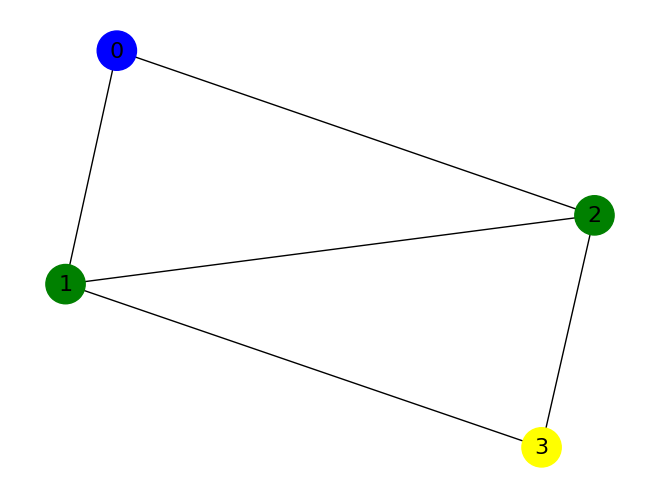

In [97]:
G = crear_grafo(n_vertices)
asignar_colores(G)
print("Grafo Original:")
mostrar_grafo(G)

Grafo después de aplicar Welsh y Powell:


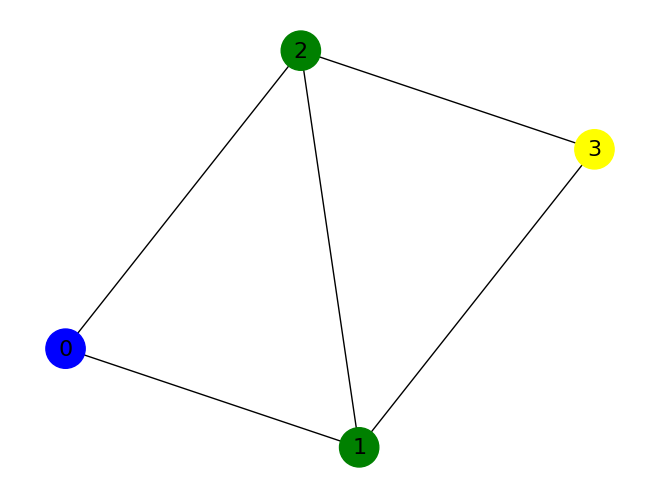

In [98]:
welsh_powell(G)
print("Grafo después de aplicar Welsh y Powell:")
mostrar_grafo(G)

In [99]:
# Tabla 1: Grados de los vértices de la Coloración Welsh y Powell
grados(G)

+------------------+---------------------+
|   No. de vértice |   Grado del vértice |
+==================+=====================+
|                1 |                   3 |
+------------------+---------------------+
|                2 |                   3 |
+------------------+---------------------+
|                0 |                   2 |
+------------------+---------------------+
|                3 |                   2 |
+------------------+---------------------+


## **Algoritmo de Coloración de Matula, Marble, Isaacson**

In [100]:
def matula_marble_isaacson(G, color_set):
    """
    Applies the Matula, Marble, Isaacson coloring algorithm with a custom set of colors.
    """
    # Sorting the vertices based on their degree in ascending order
    sorted_vertices = sorted(G.nodes(), key=lambda x: G.degree(x))
    colors = {}
    current_color_index = 0

    for vertex in sorted_vertices:
        if vertex not in colors:
            available_colors = set(color_set)
            for neighbor in G.neighbors(vertex):
                if neighbor in colors:
                    available_colors.discard(colors[neighbor])
            colors[vertex] = min(
                available_colors, key=lambda x: color_set.index(x))
            current_color_index = max(
                current_color_index, color_set.index(colors[vertex]))

    return colors

In [101]:
def draw_graph(G, colors=None):
    """
    Draws the graph with colored vertices.
    """
    pos = nx.spring_layout(G)
    if colors:
        color_map = [colors[node] for node in G.nodes()]
        nx.draw(G, pos, node_color=color_map,
                with_labels=True, cmap=plt.cm.jet)
    else:
        nx.draw(G, pos, with_labels=True)
    plt.show()

Grafo Original:


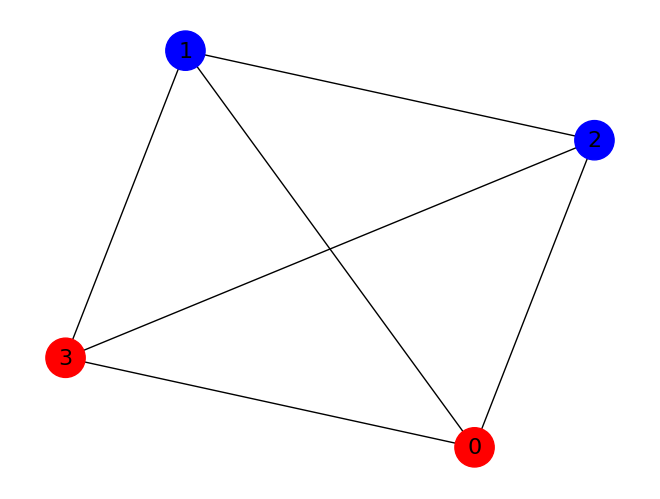

In [102]:
G = crear_grafo(n_vertices)
asignar_colores(G)
print("Grafo Original:")
mostrar_grafo(G)

Grafo después de aplicar Matula, Marble, Isaacson:


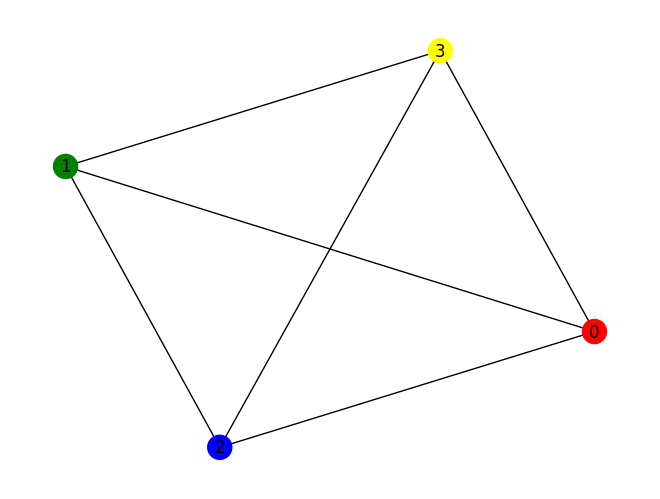

In [103]:
# Define the custom color set
custom_color_set = ['red', 'green', 'blue', 'yellow']

# Apply the Matula, Marble, Isaacson algorithm with custom colors
mmi_custom_colors = matula_marble_isaacson(
    G, custom_color_set)

# Drawing the graph after applying Matula, Marble, Isaacson Algorithm with custom colors
print("Grafo después de aplicar Matula, Marble, Isaacson:")
draw_graph(G, mmi_custom_colors)

In [104]:
# First, we will generate the degree table for each vertex using NetworkX
vertex_degrees = [(node, G.degree(node)) for node in G.nodes()]

# Sorting the vertices based on their degree in ascending order for Matula, Marble, Isaacson algorithm
vertex_degrees.sort(key=lambda x: x[1])

# Now we will use tabulate to print the table in the requested format
table = tabulate(vertex_degrees, headers=[
                 'No. de vértice', 'Grado del vértice'], tablefmt='grid')
print(table)

+------------------+---------------------+
|   No. de vértice |   Grado del vértice |
+==================+=====================+
|                0 |                   3 |
+------------------+---------------------+
|                1 |                   3 |
+------------------+---------------------+
|                2 |                   3 |
+------------------+---------------------+
|                3 |                   3 |
+------------------+---------------------+
